In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
import pandas_profiling
import missingno as msno
import datetime
import re

## This file helps you plot more efficiently
feel free to contact me(yl3963@columbia.edu) if you have any questions


## prepare dataset

In [134]:
data_msg_time=pd.read_csv(r'/Users/alphalu/Desktop/ADL/capstone/tweet/1.csv')
data_msg_time.head()

,date_posted_gmt,message
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h..."
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...


####  function add_ymdw: add year month day  week columns for original dataframe 


In [131]:
def add_ymdw(df):
    df['date']=pd.to_datetime(df['date_posted_gmt'])

    df['year']=df['date'].apply(lambda x: x.year)

    df['month']=df['date'].apply(lambda x: x.month)

    df['day']=df['date'].apply(lambda x: x.day)
    
    def getweek(a,b,c):
        return datetime.date(a,b,c).isocalendar()[1]
    df['week'] = df.apply(lambda x: getweek(x['year'], x['month'],x['day']), axis=1)

    return df

In [132]:
add_ymdw(data_msg_time)

,date_posted_gmt,message,date,year,month,day,week
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h...",2013-07-19 17:45:00,2013,7,19,29
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...,2013-07-30 15:55:00,2013,7,30,31
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15
5,9/18/13 11:51,In 503 Days Between Trayvon Dying and the Zimm...,2013-09-18 11:51:00,2013,9,18,38
6,7/11/13 19:23,ROTFLMAO lemme find out Trayvon is an octopus ...,2013-07-11 19:23:00,2013,7,11,28
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12
9,3/23/12 17:14,RT @ArthurDelaneyHP @Crewof42: Hoodies on the ...,2012-03-23 17:14:00,2012,3,23,12


In [135]:
data_msg_time=add_ymdw(data_msg_time)

### split dataset according to their year
you can get 3 dataframes finally

In [133]:
def split_year(df):
    df2012=df[df['year']==2012]
    df2013=df[df['year']==2013]
    df2014=df[df['year']==2014]
    return df2012,df2013,df2014

In [136]:
d2012,d203,d2014=split_year(data_msg_time)
d2012.head()

,date_posted_gmt,message,date,year,month,day,week
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12


In [137]:
# data_msg_time2012=data_msg_time[data_msg_time['year']==2012]
# data_msg_time2013=data_msg_time[data_msg_time['year']==2013]
# data_msg_time2014=data_msg_time[data_msg_time['year']==2014]

### you have to import dictionary

In [104]:
file = open("LIWC Dictionary/LIWC_dic.txt","r")

LIWC = file.readlines()
LIWC_dict = {}
for line in LIWC:
    line = line.split(',')
    category = line[0]
    words = line[1].split(' ')
    words[-1] = words[-1][:-1]
    LIWC_dict[category] = words
# LIWC_dict['Negemo']

### you have to prepare a dic to store all the words belong to the emotion category 

In [105]:
# dic stores all anxiety words
dic=['afraid',
 'alarm',
 'anxiety',
 'anxious',
 'anxiously',
 'anxiousness',
 'apprehens',
 'asham',
 'aversi',
 'avoid',
 'awkward',
 'confuse',
 'confused',
 'confusedly',
 'confusing',
 'desperat',
 'discomfort',
 'distraught',
 'distress',
 'disturb',
 'doubt',
 'dread',
 'dwell',
 'embarrass',
 'fear',
 'feared',
 'fearful',
 'fearing',
 'fears',
 'frantic',
 'fright',
 'guilt',
 'guilt-trip',
 'guilty',
 'hesita',
 'horrible',
 'horribly',
 'horrid',
 'horror',
 'humiliat',
 'impatien',
 'inadequa',
 'indecis',
 'inhibit',
 'insecur',
 'irrational',
 'irrita',
 'miser',
 'nervous',
 'nervously',
 'nervousness',
 'neurotic',
 'obsess',
 'overwhelm',
 'panic',
 'paranoi',
 'petrif',
 'phobi',
 'pressur',
 'reluctan',
 'repress',
 'restless',
 'rigid',
 'rigidity',
 'rigidly',
 'risk',
 'scare',
 'scared',
 'scares',
 'scarier',
 'scariest',
 'scaring',
 'scary',
 'shake',
 'shaki',
 'shaky',
 'shame',
 'shook',
 'shy',
 'shyly',
 'shyness',
 'startl',
 'strain',
 'stress',
 'struggl',
 'suspicio',
 'tense',
 'tensely',
 'tensing',
 'tension',
 'terrified',
 'terrifies',
 'terrify',
 'terrifying',
 'terror',
 'threat',
 'timid',
 'trembl',
 'turmoil',
 'twitchy',
 'uncertain',
 'uncomfortabl',
 'uncontrol',
 'uneas',
 'unsettl',
 'unsure',
 'upset',
 'upsets',
 'upsetting',
 'uptight',
 'vulnerab',
 'worried',
 'worrier',
 'worries',
 'worry',
 'worrying']

### function to check whether the message contains the category or not

In [111]:
def check_category(s,category,dic):
    '''
    s type: string
    category type: string 
    '''
    for word in dic:
        if word in s:
            return category
    return 'NA'
    

In [112]:
check_category('stressed','anx',dic)

'anx'

In [113]:
check_category('happy!!!','anx',dic)

'NA'

In [114]:
check_category('afraid','Negemo',LIWC_dict['Negemo'])

'Negemo'

In [83]:
check_category('confu','Negemo',LIWC_dict['Negemo'])

'NA'

### add_tag_col
- df:  dataframe 
- cate: emotion category
- dic: the dictionary stores all words belong to the category
e.g. here tag='anx' means the message of the row contains anxiety words

In [115]:
def add_tag_col(df,cate,dic):
    df['tag']=df.apply(lambda x: check_category(x['message'],cate,dic),axis=1)
    return df

In [118]:
data_msg_time2012.head()

,date_posted_gmt,message,date,year,month,day,week
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12


In [119]:
data_msg_time2012=add_tag_col(data_msg_time2012,'anx',dic)
data_msg_time2012.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_posted_gmt,message,date,year,month,day,week,tag
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15,NA
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12,NA
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15,NA
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13,NA
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12,NA


### plot_count_trend function
- df: the dataframe contains at least **message,week, tag** cols

- cate: the category of emotion e.g. anxiety='anx

In [120]:
def plot_count_trend(df,cate):
    df_cate_week=df[df['tag']==cate].groupby('week')['message'].count()
    plt.figure(figsize=(20,8))
    plt.title('total tweets in 2012 throughout weeks',size=20)
    plt.xlabel('week in 2012',size=20)
    plt.ylabel('tweet num',size=20)
    # gca stands for 'get current axis'
    ax = plt.gca()
    df_cate_week.plot(kind='line',ax=ax,fontsize=20)


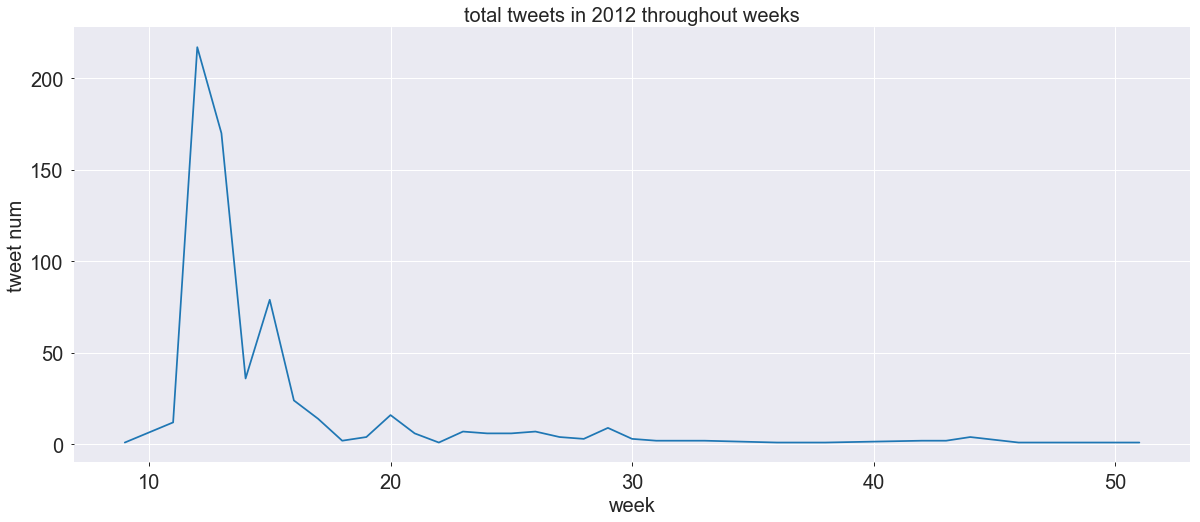

In [121]:
plot_count_trend(data_msg_time2012,'anx')

### plot_fraction_trend
- df: the dataframe contains at least **message,week,tag cols**
- cate: the category of emotion e.g. anxiety='anx
- title: graph title
- xlabel: graph xlabel

,week,anxiety%
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,7.142857
9,10,0.000000


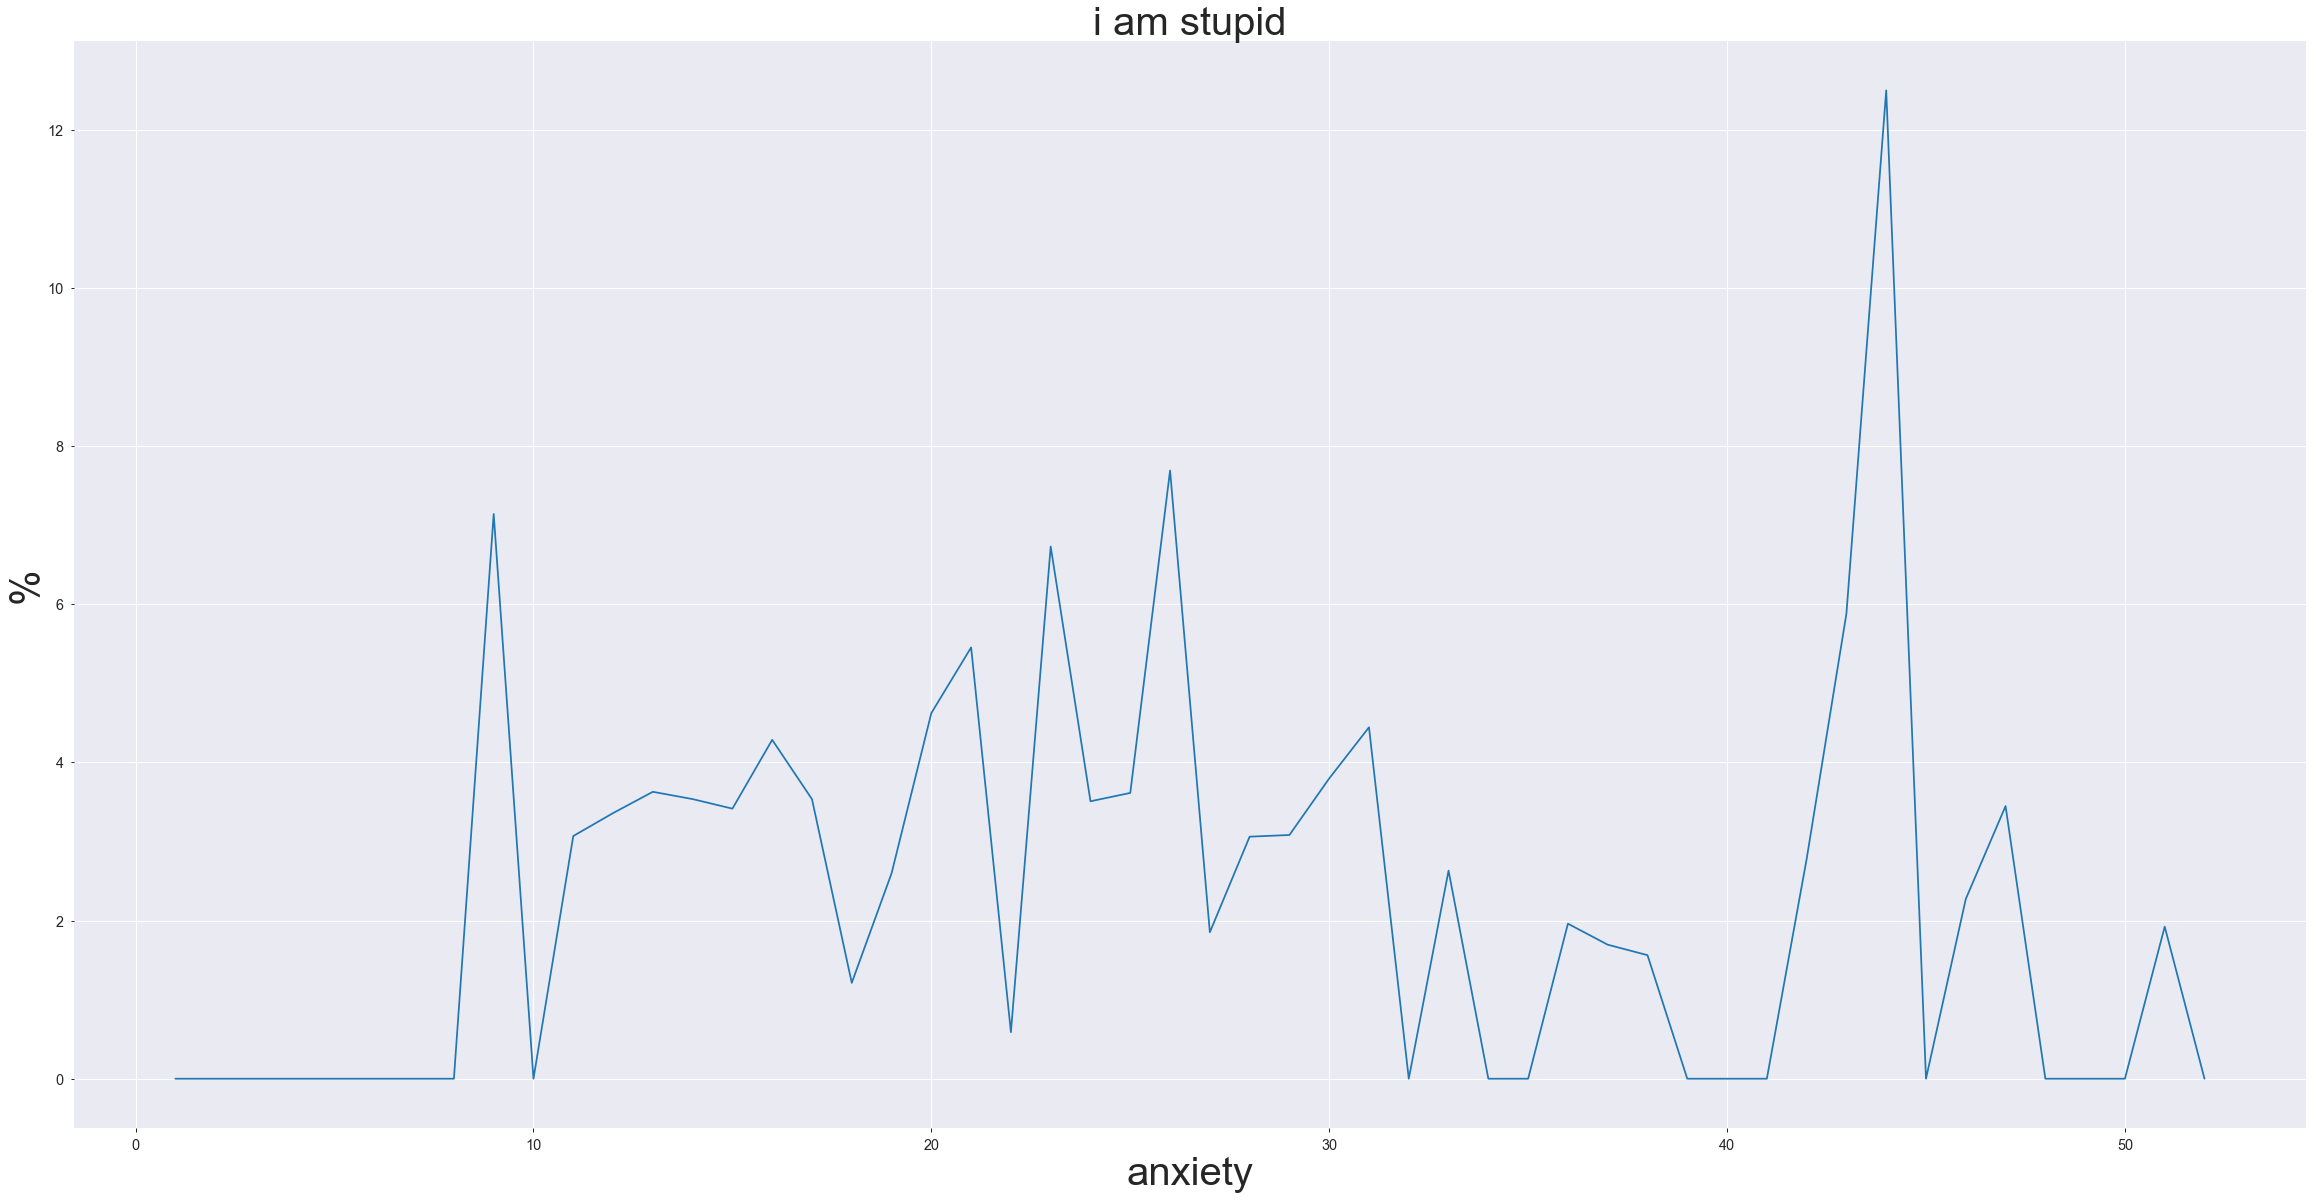

In [122]:
def plot_fraction_trend(df,cate,title,xlabel):
    df_cate_week=df[df['tag']==cate].groupby('week')['message'].count()
    all_res=df.groupby('week')['message'].count()
    catelist=[]
    for week,val in df_cate_week.items():
        catelist.append((week,val))
        
    alltweetlist=[]
    for week,val in all_res.items():
        alltweetlist.append((week,val))
        
    final0=[]
    for i in range(1,53):
        for week1,anxnum in catelist:
            if week1!=i:
                final0.append((i,0))
                continue
            for week2,tweetnum in alltweetlist:
                if week1==week2:
                    final0.append((week1,100*anxnum/tweetnum))
                    continue
                    
    final0=list(set(final0))
    final0.sort()
    
    final1={}
    for a,b in final0:
        if a not in final1:
            final1[a]=b
        else:
            final1[a]+=b
            
    #form a dataframe you can change the col names
    cate_tb=pd.DataFrame(list(final1.items()), columns=['week', 'anxiety%'])
    
    plt.figure(figsize=(40,20))
    plt.title(title,size=40)
    plt.xlabel(xlabel,size=40)
    plt.ylabel('%',size=40)
    # gca stands for 'get current axis'
    ax = plt.gca()
    lists = sorted(final1.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x,y)
    return cate_tb

plot_fraction_trend(data_msg_time2012,'anx','i am stupid','anxiety')

#### one line to produce

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,week,anxiety%
0,1,25.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,25.000000
8,9,21.428571
9,10,32.258065


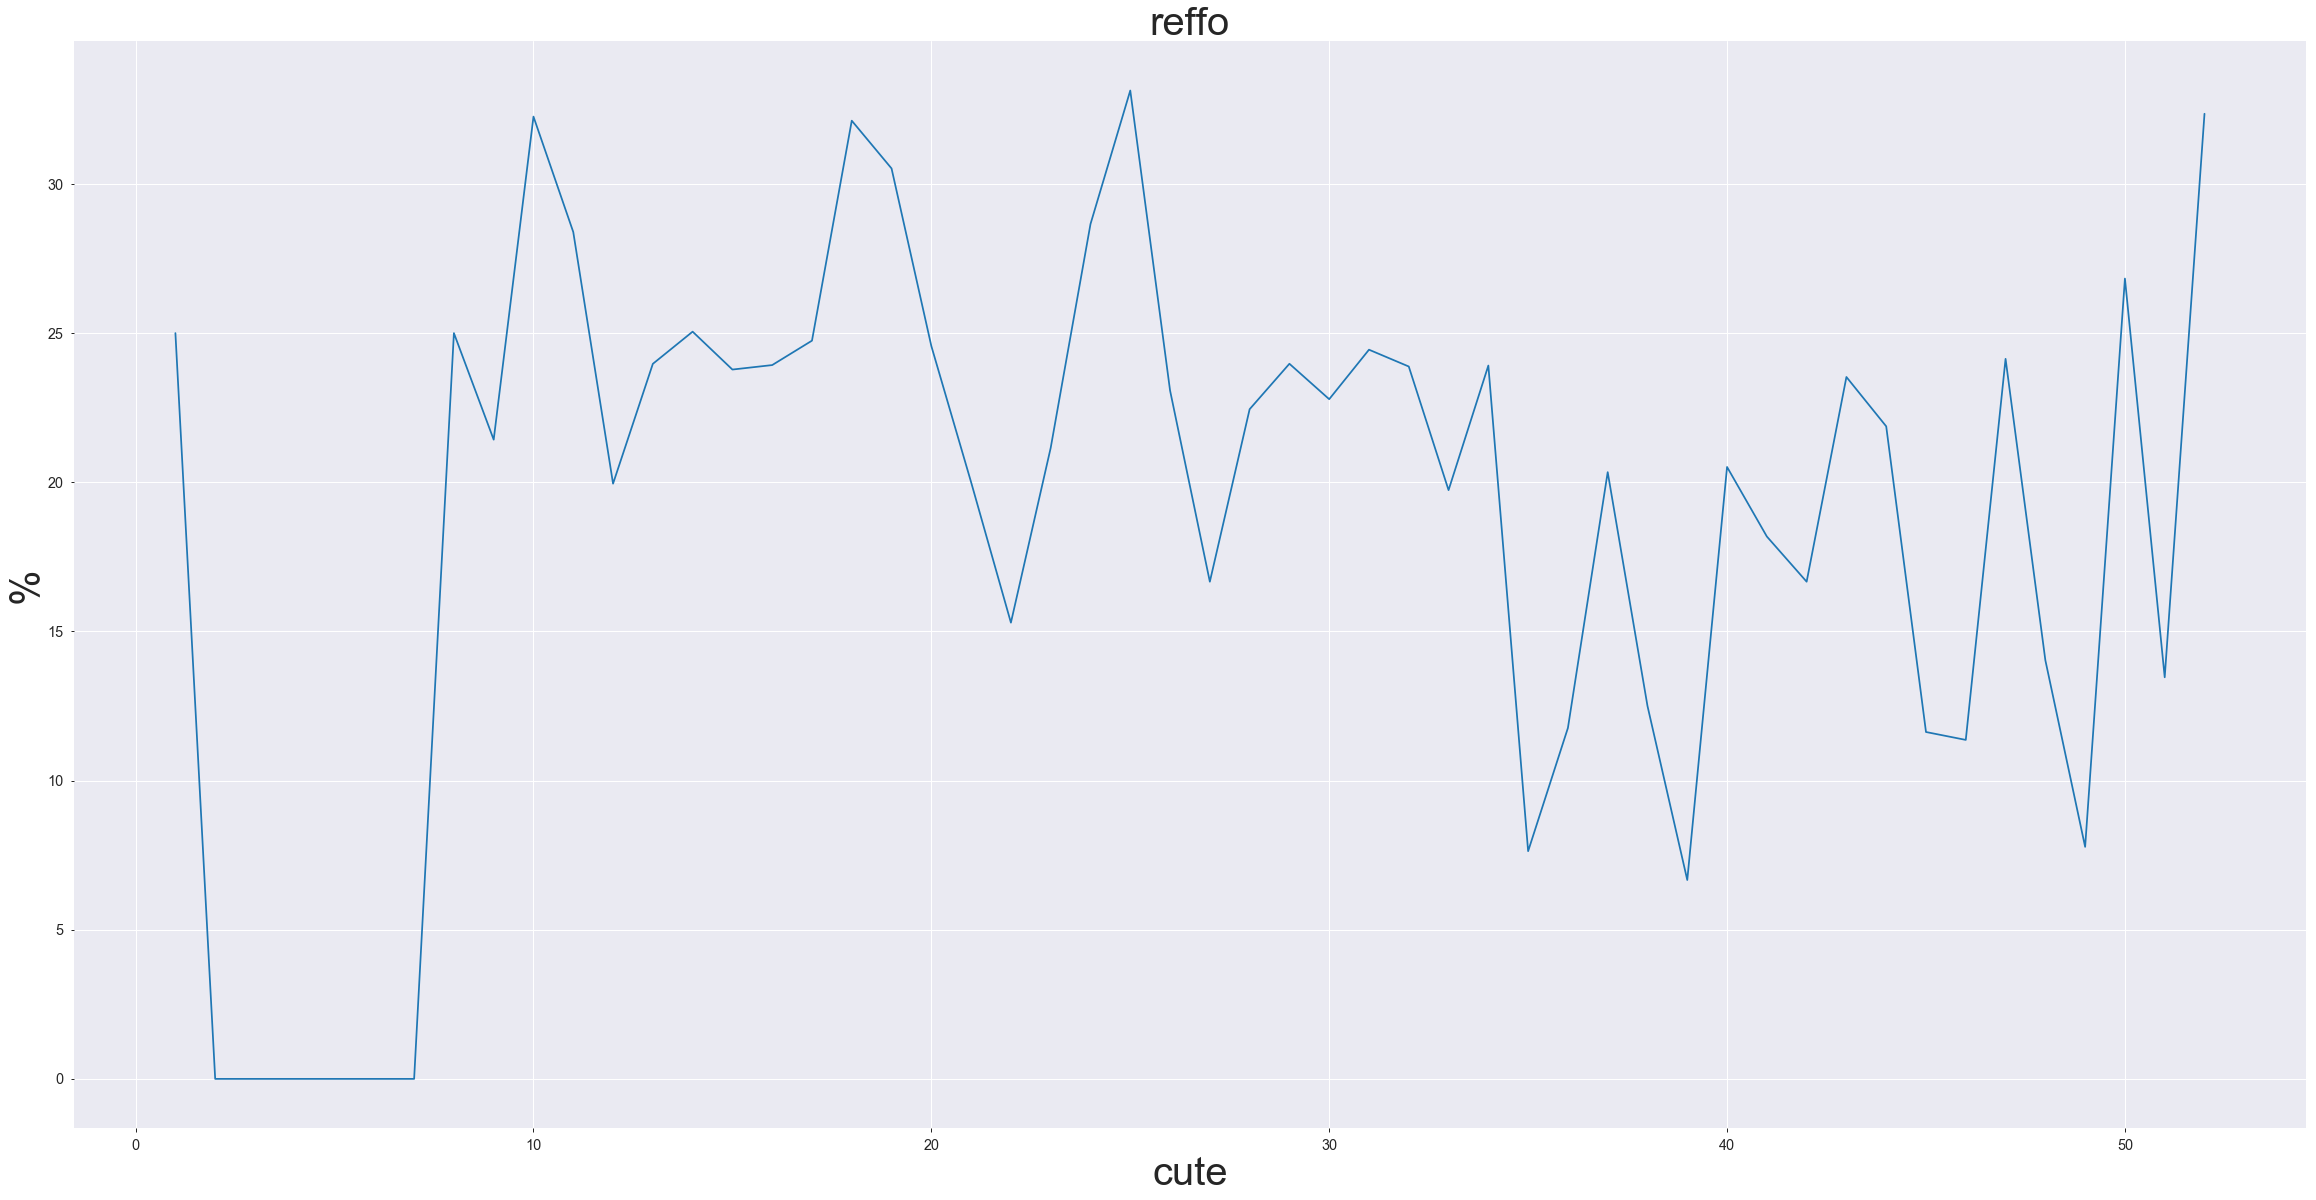

In [96]:
plot_fraction_trend(add_tag_col(data_msg_time2012,'Negemo',LIWC_dict['Negemo']),'Negemo','reffo','cute')